In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.4.1'

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
a = 2,3,4
print(type(a))

<class 'tuple'>


In [6]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [7]:
x_train.shape # training Data consists of 60000 images
# Each image

(60000, 28, 28)

In [8]:
import matplotlib.pyplot as plt

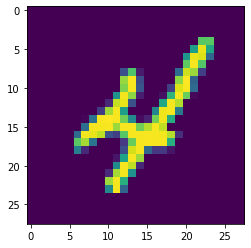

In [9]:
plt.imshow(x_train[9])
plt.show()

In [10]:
y_train[0] 

5

In [11]:
x_train[0].max()

255

In [12]:
x_train = x_train/255

In [13]:
x_test = x_test/255

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,input_shape = x_train.shape[1:],activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

In [15]:
model.add(tf.keras.layers.Flatten(input_shape =x_train.shape[1:])) # Input Layer
model.add(tf.keras.layers.Dense(128,activation='relu')) # Hidden Layer 1
model.add(tf.keras.layers.Dense(128,activation='relu'))  # Hidden Layer 2
model.add(tf.keras.layers.Dense(10,activation='softmax')) # Output Layer

In [16]:
#model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
#model.fit(x_train,y_train, epochs = 10)

In [17]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [18]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')
model.fit(x_train,y_train, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 16s 7ms/step - loss: 0.8158
Epoch 2/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1351
Epoch 3/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0913
Epoch 4/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0667
Epoch 5/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0566
Epoch 6/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0499
Epoch 7/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0400
Epoch 8/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0406
Epoch 9/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0312
Epoch 10/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0305
Epoch 11/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0250
Epoch 12/50
1875/1875 [==============================] - 13s 7ms/step - lo

In [18]:
y_pred = model.predict_classes(x_test)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_pred, y_test)

ModuleNotFoundError: No module named 'sklearn'

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

ModuleNotFoundError: No module named 'sklearn'

In [21]:
print( 'hello', 'world', sep = '\n')

hello
world


In [22]:
import cv2
image = x_test[0]
i = cv2.resize(image,(28,28)).reshape(1,28,28)
model.predict_classes(i)

array([7], dtype=int64)

In [23]:
y_test[0]

7

In [21]:
model.save('model_digit.h5')

In [26]:
m_new = tf.keras.models.load_model('model_digit.h5')

In [ ]:
m_new.predict_classes(x_test)

In [ ]:
plt.imshow(x_train[2])